In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\mrasi\Desktop\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [7]:
df['Churn_Numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [8]:
churn_rate = df['Churn_Numeric'].mean() * 100
avg_monthly = df['MonthlyCharges'].mean()
avg_tenure = df['tenure'].mean()
clv = avg_monthly * avg_tenure

print(f"Overall Churn Rate: {churn_rate:.2f}%")
print(f"Estimated Simple CLV: ${clv:.2f}")

Overall Churn Rate: 26.54%
Estimated Simple CLV: $2096.41


In [9]:
df['Tenure_Group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], 
                            labels=['0-1y', '1-2y', '2-3y', '3-4y', '4-5y', '5-6y'])

In [25]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Tenure_Group', ylabel='Churn_Numeric'>

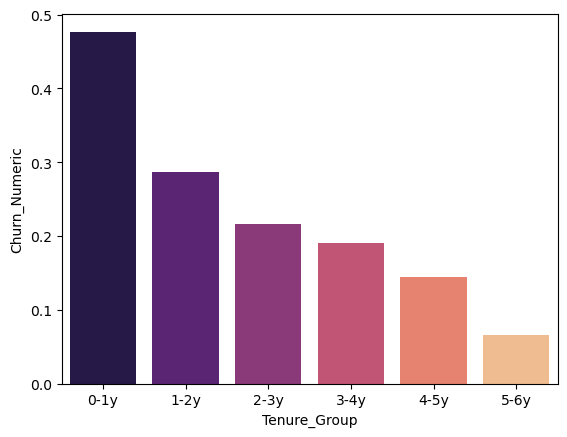

In [28]:
sns.barplot(x='Tenure_Group', y='Churn_Numeric', data=df, palette='magma', ci=None)

<Axes: xlabel='Contract', ylabel='Churn_Numeric'>

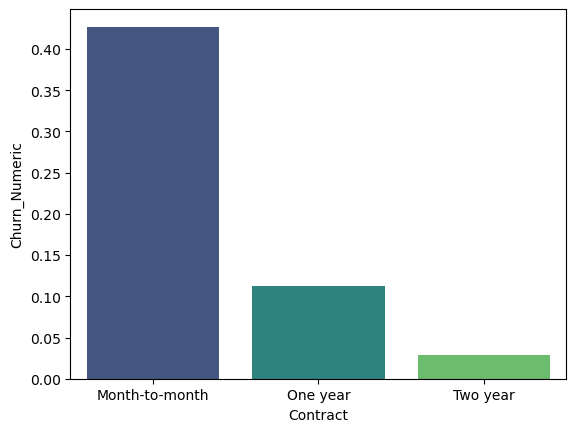

In [27]:
sns.barplot(x='Contract', y='Churn_Numeric', data=df, palette='viridis', ci=None)